In [1]:
import numpy as np
import scipy.optimize as opt
import pandas as pd
from scipy.interpolate import interp1d
import matplotlib
import matplotlib.pyplot as plt
import scipy.optimize as opt
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
ms = np.array([160e-3, 480e-3, 816e-3, 1.14, 1.46, 1.79, 2.12, 2.43, 2.78, 3.10, 3.42])

mv = np.array([186, -132, 100, -74, 56, -42, 32, -22, 18, -12, 12])

mv_abs = np.abs(mv)


In [3]:
def strong_underdamped_exp(t, A, omega, alpha):
    return A * omega * np.exp(-alpha * t)


In [4]:
start_pars = [.4, 500, .9]

pars, cov = opt.curve_fit(strong_underdamped_exp, ms, mv_abs, p0=start_pars)

[A, omega, alpha] = pars
errs = np.sqrt(np.diag(cov))
[A_err, omega_err, alpha_err] = errs

volts_pred = strong_underdamped_exp(np.linspace(0.15,3.5), A, omega, alpha)


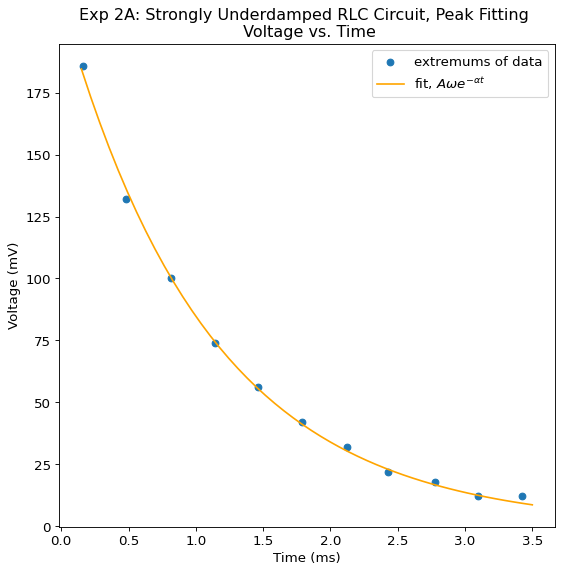

In [14]:
fig1=plt.figure(figsize=(8, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': '12'})

plt.scatter(ms, mv_abs, label="extremums of data")
plt.plot(np.linspace(0.15,3.5), volts_pred, color='orange', label=r'fit, $A \omega e^{-\alpha t}$')

plt.title("Exp 2A: Strongly Underdamped RLC Circuit, Peak Fitting \n Voltage vs. Time")
plt.xlabel("Time (ms)")
plt.ylabel("Voltage (mV)")

plt.legend(loc=1)
plt.show()
